<a href="https://colab.research.google.com/github/mhmmdmin/Assignment/blob/main/Assignment_Day_14_Muhammad_Amin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Basic Assignment

##Question 1

Jelaskan mengapa proses matching perlu dilakukan ketika ingin mengukur dampak dari suatu treatment pada propensity score modeling?


Answer:
Rubin and Thomas (1992b) and Rubin and Thomas (1996), kenapa proses matching perlu dilakukan adalah untuk mendapatkan perkiraan analitik untuk mengurangi bias dari outcome yang dapat diperoleh ketika melakukan matching terhadap diskriminan yang sebenarnya atau yang diperkirakan dengan kovariat yang terdistribusi normal.

---
Rubin DB, Thomas N. Characterizing the effect of matching using linear propensity score methods with normal distributions. Biometrika. 1992b;79:797–809.

Rubin DB, Thomas N. Matching using estimated propensity scores, relating theory to practice. Biometrics. 1996;52:249–264.

## Question 2

Sebelum adanya Double ML, peneliti machine learning menggunakan metode Double Selection untuk menguji efek dari treatment. Namun pada akhirnya Double Machine Learning digunakan karena lebih baik dibandingkan dengan Double Selection. Jelaskan mengapa Double ML lebih baik digunakan ketimbang Double Selection? Masalah apa yang ada pada Double Selection yang dapat diselesaikan dengan Double ML?


Answer:
DML lebih baik daripada Double Selection karena DML menghilangkan bias asimtotik dari estimasi koefisien dari T parameter. Di mana masalah yang sering muncul pada Double Selection adalah mengharuskan mengontrol features-features yang mempengaruhi noise pada data tersebut, yang nyatanya itu sangat unrealistic untuk dilakukan pada setiap project.


---



https://medium.com/teconomics-blog/using-ml-to-resolve-experiments-faster-bd8053ff602e#:~:text=Relative%20to%20Double%20Selection%2C%20Double,to%20be%20the%20clear%20winner.

## Question 3

Ada banyak metrik yang dapat digunakan untuk mengukur dampak dari suatu variabel: ATE, CATE, dan LATE. Jelaskan kapan masing-masing metrik digunakan!

Answer:
1. Metrik ATE digunakan ketika kita ingin melihat dampak dari suatu variabel secara komposisional bukan secara individual. Biasa digunakan dalam industri medis karena memungkinkan untuk mengisolasi individu2 yang akan dirawat dengan treatment2 tertentu, tapi untuk digunakan dalam social science hal ini akan sangat sulit.

2. Metrik CATE digunakan ketika kita ingin melihat heterogenitas dari dampak treatment pada subpopulasi atau group populasi ketika asumsi unconfoundedness berlaku. CATE juga digunakan untuk menangkap variasi yang digunakan untuk mengidentifikasi unconditional average.

3. Metrik LATE digunakan untuk melihat dampak dari treatment hanya kepada "complier" (mereka yang melakukan treatment jika diperlukan dan sebaliknya). LATE tidak menangkap dampak treatment dari setiap subjek dalam populasi.





---
https://statmodeling.stat.columbia.edu/2020/06/30/understanding-the-average-treatment-effect-number/

http://www.personal.ceu.hu/staff/Robert_Lieli/cate.pdf

https://egap.org/resource/10-things-to-know-about-the-local-average-treatment-effect/

## Question 4

Berikut adalah pertanyaan open-ended, akan dinilai berdasarkan argumentasi yang memiliki landasan. 
Kita dapat mengekstrak knowledge dari model dengan menggunakan interpretable machine learning. Namun kita juga dapat menggunakan metode seperti double ML untuk mendapatkan pola sebab-akibat berdasarkan data generation process. Mana metode yang lebih baik untuk menjelaskan dampak dari akibat? Kapan metode interpretable machine learning dapat digunakan untuk analisis kausal?

Answer:
Menurut saya metode yang lebih baik untuk menjelaskan dampak dari akibat adalah interpretable machine learning. Metode interpretable machine learning dapat digunakan untuk analisis kausal ketika ingin menjelaskan counterfactual model.



---


https://arxiv.org/pdf/2006.16789.pdf

# Advanced Assignment

##Install and Load Packages

In [1]:
!pip install econml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 5.0 MB/s 
     |████████████████████████████████| 564 kB 44.5 MB/s 
     |████████████████████████████████| 164 kB 51.8 MB/s 
     |████████████████████████████████| 77 kB 6.2 MB/s 
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


In [2]:
# data exploration package
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# scikit learn
from sklearn.linear_model import ElasticNetCV, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# econml
from econml.dml import DML
from econml.metalearners import TLearner, SLearner, XLearner

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Load Dataset

In [3]:
mindset = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/learning_mindset/learning_mindset.csv")

##Check Dataset and Its Structure

In [4]:
mindset.head()

,schoolid,intervention,achievement_score,success_expect,ethnicity,gender,frst_in_family,school_urbanicity,school_mindset,school_achievement,school_ethnic_minority,school_poverty,school_size
0,76,1,0.277359,6,4,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
1,76,1,-0.449646,4,12,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
2,76,1,0.769703,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
3,76,1,-0.121763,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
4,76,1,1.526147,6,4,1,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757


In [5]:
mindset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10391 entries, 0 to 10390
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   schoolid                10391 non-null  int64  
 1   intervention            10391 non-null  int64  
 2   achievement_score       10391 non-null  float64
 3   success_expect          10391 non-null  int64  
 4   ethnicity               10391 non-null  int64  
 5   gender                  10391 non-null  int64  
 6   frst_in_family          10391 non-null  int64  
 7   school_urbanicity       10391 non-null  int64  
 8   school_mindset          10391 non-null  float64
 9   school_achievement      10391 non-null  float64
 10  school_ethnic_minority  10391 non-null  float64
 11  school_poverty          10391 non-null  float64
 12  school_size             10391 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 1.0 MB


In [6]:
#check duplicate
mindset.duplicated().sum()

0

In [7]:
# Check unique value
for x in mindset.columns:
  print(f"unique of {x} ")
  print(f"{mindset[x].unique()}")
  print()

unique of schoolid 
[76 75 74 73 72 71 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53
 52 51 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29
 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5
  4  3  2  1]

unique of intervention 
[1 0]

unique of achievement_score 
[ 0.27735862 -0.44964639  0.76970344 ...  0.37082009 -0.39629671
  0.47897006]

unique of success_expect 
[6 4 7 5 3 1 2]

unique of ethnicity 
[ 4 12  5  1  2 14 15 10  6  9  8  7 11  3 13]

unique of gender 
[2 1]

unique of frst_in_family 
[1 0]

unique of school_urbanicity 
[4 3 1 0 2]

unique of school_mindset 
[ 0.33454352  0.99162827  0.98398211 -0.46294452  0.4204414  -3.08878982
  0.98824178 -0.05057947 -0.03439241 -1.11533652  1.02177695 -0.95397163
 -0.35420731 -1.29411031 -1.13224131 -1.16814528  0.92418344  0.20834922
 -0.61788794  0.09716239  1.18151615  1.93658085  0.25531863  0.999101
  0.19760784 -1.0362246   0.2113852   0.92542289  0.17342362 -1.23927231
  1.0

##Data Inspection

In [8]:
mindset.groupby('intervention').agg({
    'schoolid': 'nunique',
    'achievement_score': 'mean'
}).rename(columns={
    'schoolid': 'Total Schools',
    'achievement_score': 'Average Achievement Score'
})

,Total Schools,Average Achievement Score
intervention,,
0,76,-0.153803
1,76,0.318469


As we can see schools that attend growth mindset seminar tend to have a better achievement score.

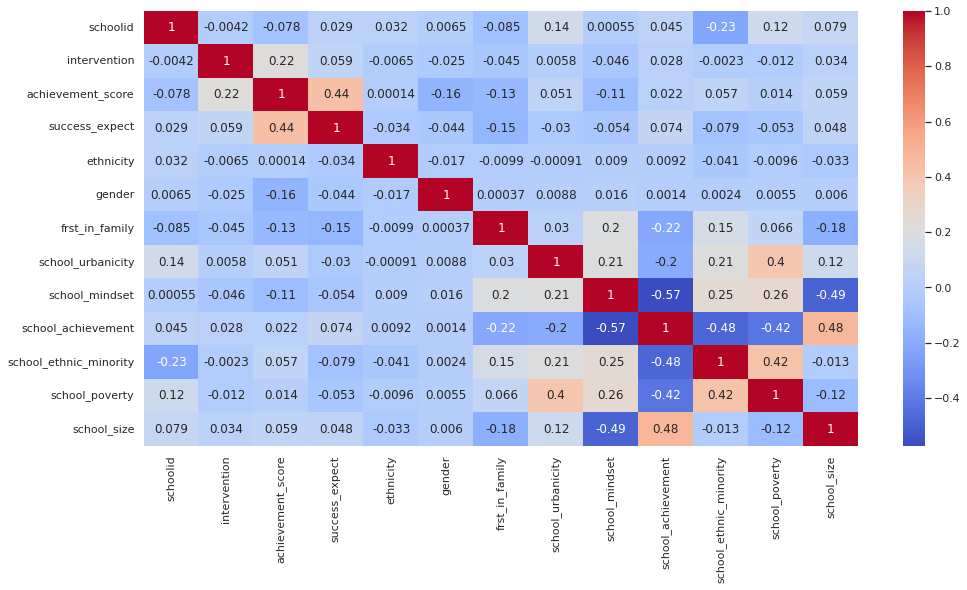

In [9]:
# Corr plot to see correlation between other variables and intervention and achievement score
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(mindset.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

Confounders are variables that affect the outcome and treatment. So, confounders should have correlation with intervention and achievement score. But after seeing correlation I just come out with success expect as confounders. We will see another POV to see the relation others variables with intervention and achievement score.

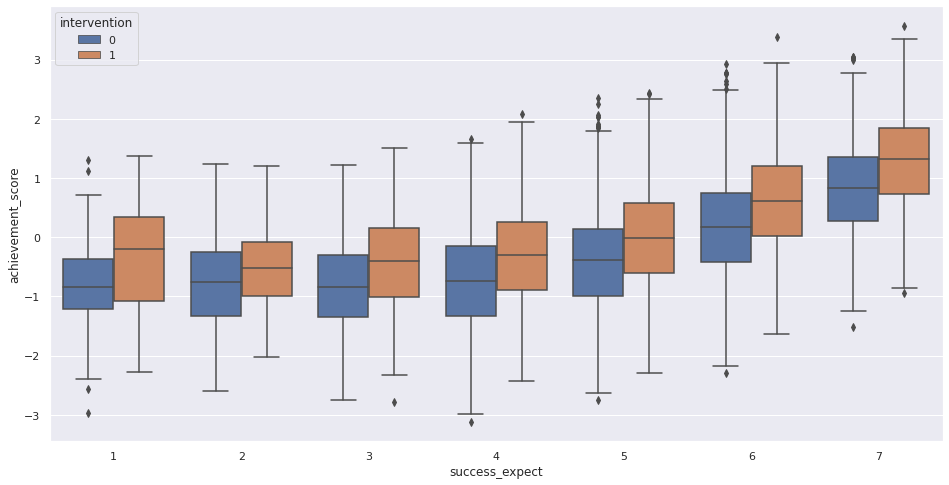

In [10]:
# Plot for success expect
sns.boxplot(data=mindset,y='achievement_score',x='success_expect', hue='intervention')

As we can see in this box plot, we can assume higher success expect affect intervention and achievement score as well.

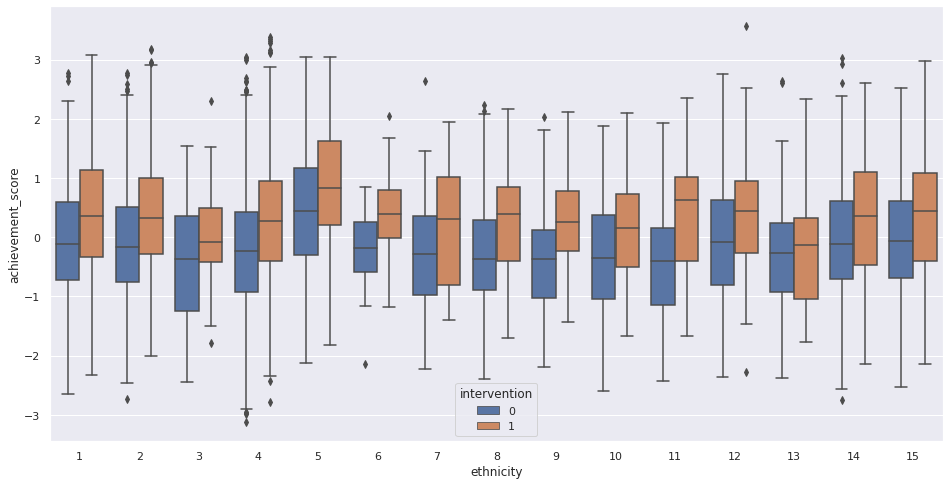

In [11]:
# Plot for ethnicity
sns.boxplot(data=mindset,y='achievement_score',x='ethnicity', hue='intervention')

As we can see, the data spread randomly. But I see several ethnicities have higher achievement score between before and after intervention. Maybe I will take ethnicity as confounders.

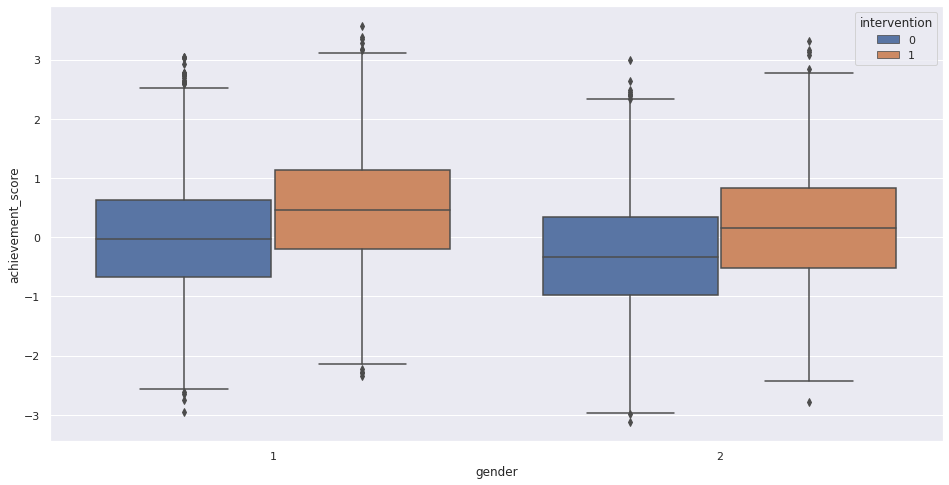

In [12]:
# Plot for gender
sns.boxplot(data=mindset,y='achievement_score',x='gender', hue='intervention')

As we can see from the plot, the differences between gender 1 and 2 is not too significant. So I won't take this as confounders.



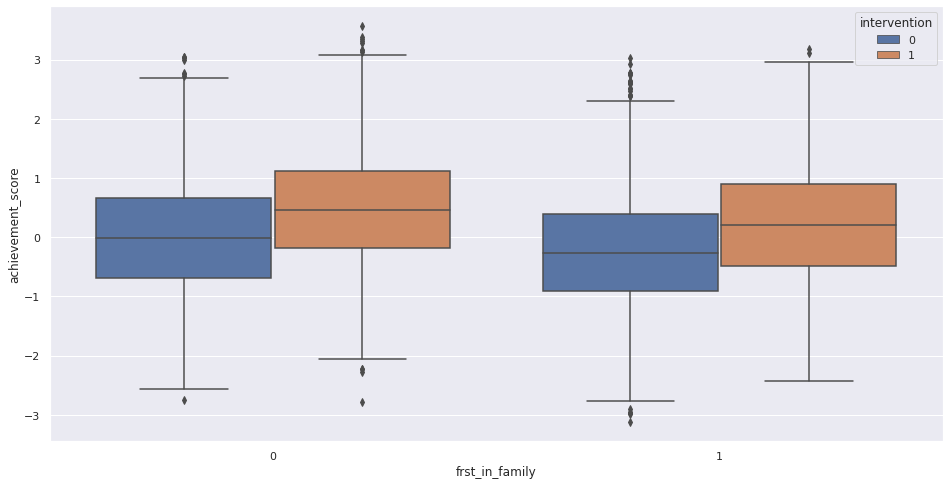

In [13]:
# Plot for first in family generation
sns.boxplot(data=mindset,y='achievement_score',x='frst_in_family', hue='intervention')

I think first in family is also like gender. They who is first generation in his family and the opposite almost have same achievement score even before and after treatment. So I won't take this as confounders.

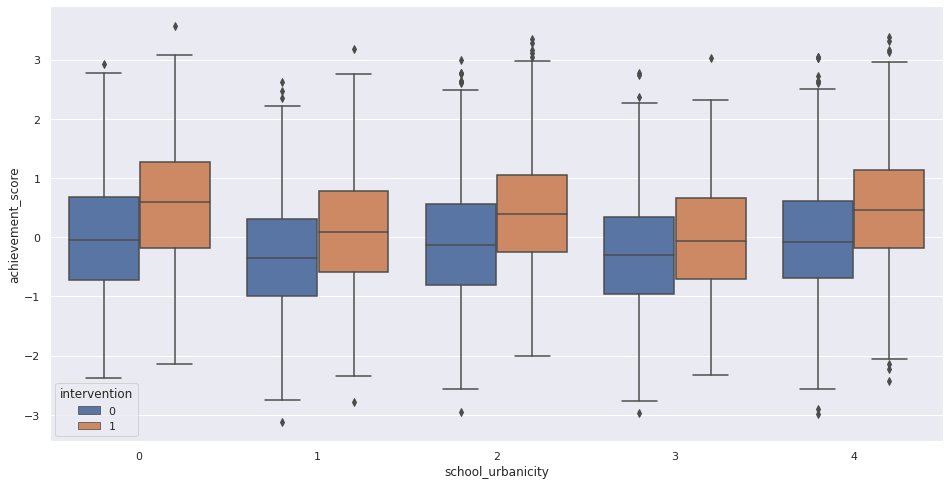

In [14]:
# Plot for school urbanicity
sns.boxplot(data=mindset,y='achievement_score',x='school_urbanicity', hue='intervention')

School urbanicity doesn't seem directly impact achievement score which can be seen the fixed mindset student is not significantly different from the others. I won't take this as confounders.

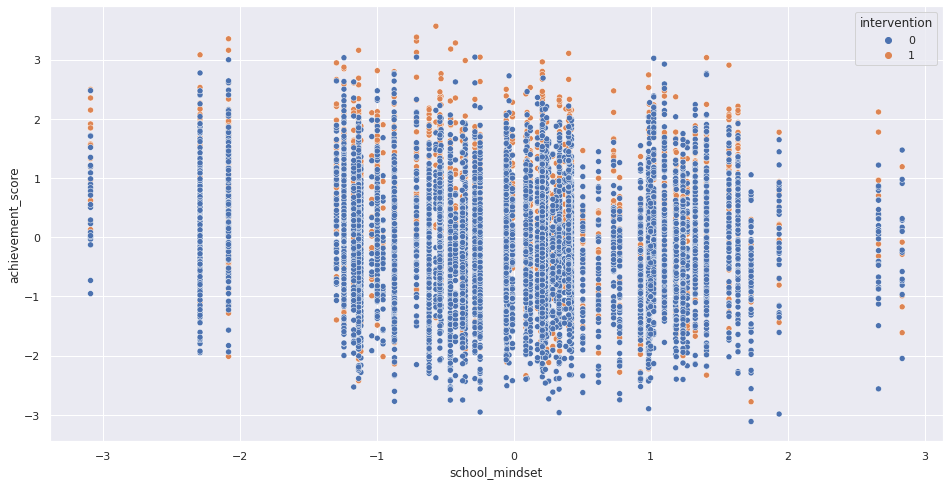

In [15]:
# Plot for school mindset
sns.scatterplot(data=mindset,y='achievement_score',x='school_mindset', hue='intervention')

The higher school mindset value, the least students who has growth mindset. I think I will take it as confounders.

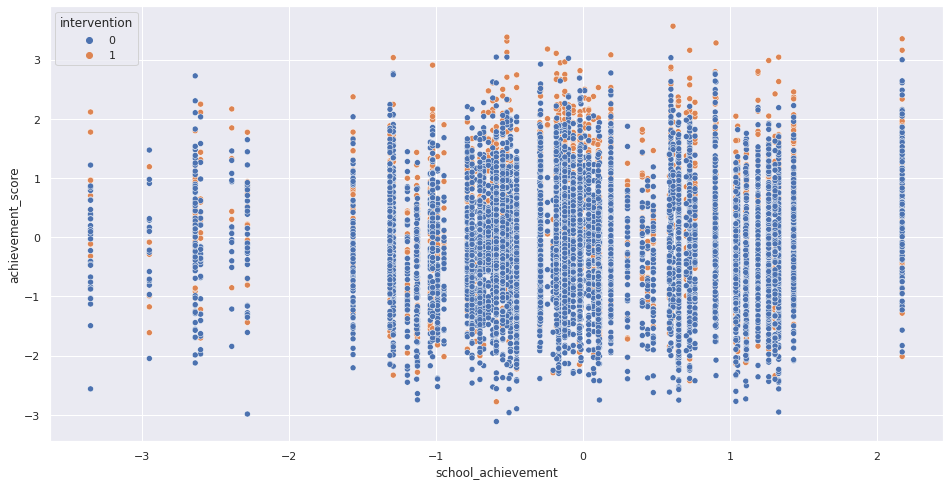

In [16]:
# Plot for school achievement
sns.scatterplot(data=mindset,y='achievement_score',x='school_achievement', hue='intervention')

I don't think school achievement impact to achievement score of students and intervention according to this plot. So I won't take it as confounders.

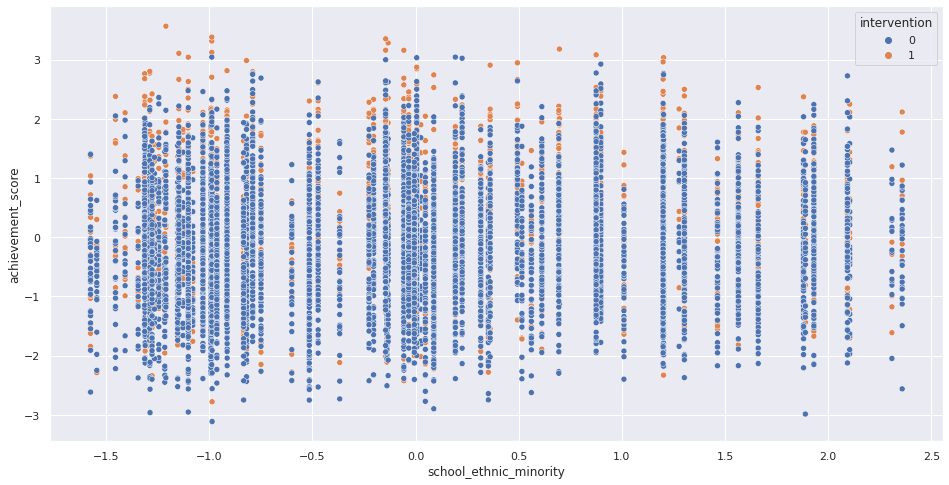

In [17]:
# Plot for school ethnic minority
sns.scatterplot(data=mindset,y='achievement_score',x='school_ethnic_minority', hue='intervention')

I think I won't take school ethnic minority as confounders because I couldn't catch any information from the plot above.

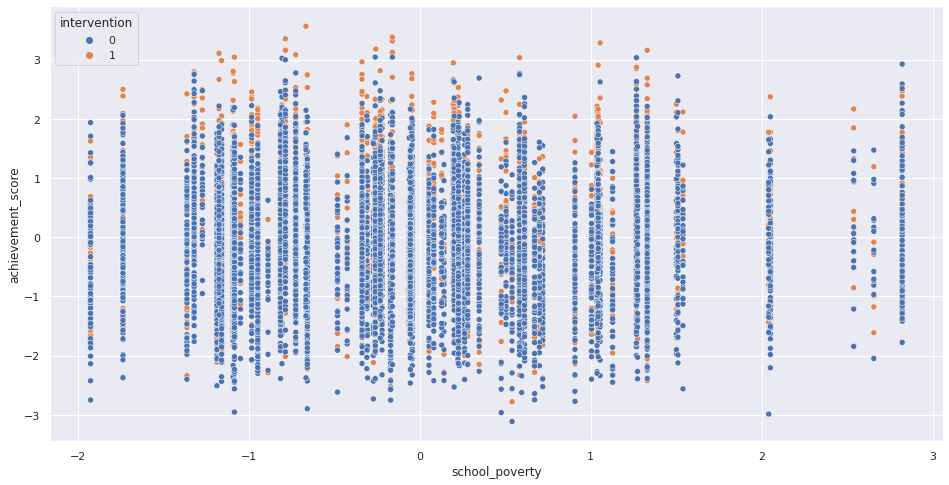

In [18]:
# Plot for school_poverty
sns.scatterplot(data=mindset,y='achievement_score',x='school_poverty', hue='intervention')

Same as school ethnic minority, I couldn't catch any information in this plot.

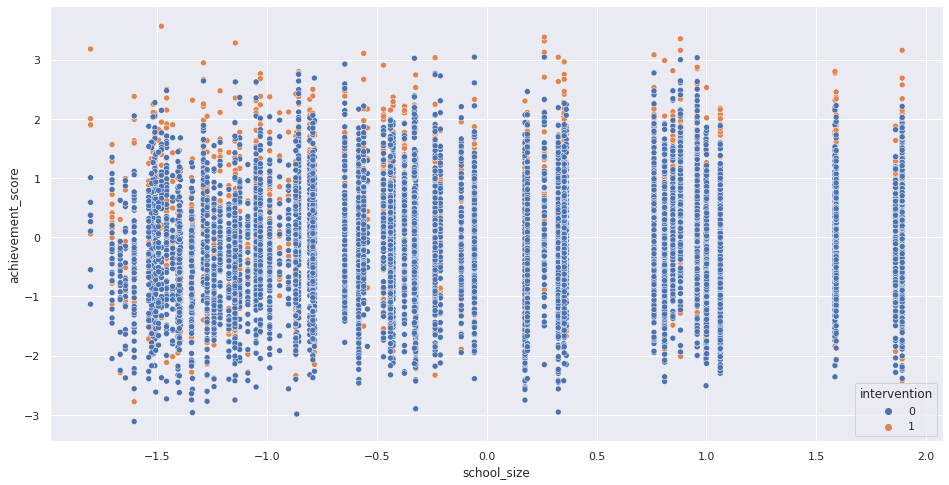

In [19]:
# Plot for school_size
sns.scatterplot(data=mindset,y='achievement_score',x='school_size', hue='intervention')

I don't think school size has any impact to achievement score and intervention.

##Modeling

In [23]:
# Make new dataset and randomize to be splitted
shuffled = mindset.sample(frac=1)
shuffled = shuffled.reset_index()
shuffled = shuffled.drop(['index'], axis = 1)

In [24]:
# Split into 2 dataset
mindset_train = shuffled.iloc[:7275]
mindset_test = shuffled.iloc[7275:]

In [25]:
# Check Train dataset
mindset_train.head()

,schoolid,intervention,achievement_score,success_expect,ethnicity,gender,frst_in_family,school_urbanicity,school_mindset,school_achievement,school_ethnic_minority,school_poverty,school_size
0,52,0,-1.423070,5,14,2,1,3,0.197608,-0.726696,-1.079894,-0.061428,-1.395542
1,59,0,0.922485,5,4,1,1,2,0.208349,1.191422,-1.288352,-1.090926,1.586156
2,4,0,-0.003433,6,2,1,1,0,-2.289636,0.190797,0.875012,-0.724801,0.761781
3,72,0,0.706277,6,3,2,0,3,0.420441,-0.491972,-0.913405,-0.043159,-0.438531
4,60,1,-0.382504,5,11,2,0,3,0.924183,0.075037,-0.599969,0.142414,-1.088472


In [26]:
# Check Test Dataset
mindset_test.head()

,schoolid,intervention,achievement_score,success_expect,ethnicity,gender,frst_in_family,school_urbanicity,school_mindset,school_achievement,school_ethnic_minority,school_poverty,school_size
7275,49,1,1.542836,7,4,2,0,1,0.925423,-0.987806,-1.153011,0.719658,-1.242473
7276,73,1,0.832351,6,4,2,1,1,-0.462945,0.652608,-0.515202,-0.169849,0.173954
7277,58,1,0.320138,6,12,2,0,1,-0.617888,-0.163619,-0.991882,-0.946657,1.063790
7278,63,0,-0.490101,4,10,1,0,4,-1.294110,-0.153247,0.493540,0.196662,-1.290616
7279,16,0,0.502644,6,13,2,0,1,-0.538975,1.433826,-0.033161,-0.982274,1.591641


In [27]:
# outcome
y = "achievement_score"
# treatment
T = "intervention"
# covariates
X = ["success_expect", "ethnicity","school_mindset"]

In [28]:
mindset_train[y]

0      -1.423070
1       0.922485
2      -0.003433
3       0.706277
4      -0.382504
          ...   
7270    1.475563
7271    0.070544
7272    1.126688
7273    1.126236
7274   -0.245766
Name: achievement_score, Length: 7275, dtype: float64

In [29]:
mindset_train[T]

0       0
1       0
2       0
3       0
4       1
       ..
7270    0
7271    0
7272    0
7273    0
7274    1
Name: intervention, Length: 7275, dtype: int64

In [30]:
mindset_train[X]

,success_expect,ethnicity,school_mindset
0,5,14,0.197608
1,5,4,0.208349
2,6,2,-2.289636
3,6,3,0.420441
4,5,11,0.924183
...,...,...,...
7270,6,4,0.334544
7271,6,2,-2.081630
7272,6,4,0.420441
7273,7,8,0.406316


##X Learner

The reason I choose X learner because the data is imbalance for treatment.

In [31]:
# Define X-learner
models = DecisionTreeRegressor(max_depth=5)
propensity_model = RandomForestClassifier(n_estimators=100, max_depth=6)
X_learner = XLearner(models=models, propensity_model=propensity_model)
# Fit learner to data
X_learner.fit(Y = mindset_train[y], T = mindset_train[T], X = mindset_train[X])

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [32]:
# Estimate treatment effects on test data
X_te = X_learner.effect(mindset_test[X])

In [33]:
# measure average treatment
np.mean(X_te)

As we can see from the measure of average treatment, we can assume that the impact of treatment is significant enough.

In [34]:
X_learner_df = pd.DataFrame({"model":"X-learner", "treatment_effect": X_te})

In [36]:
X_learner_df

,model,treatment_effect
0,X-learner,0.349706
1,X-learner,0.104702
2,X-learner,0.165388
3,X-learner,0.578116
4,X-learner,0.951248
...,...,...
3111,X-learner,0.348924
3112,X-learner,0.345747
3113,X-learner,0.552419
3114,X-learner,0.348797


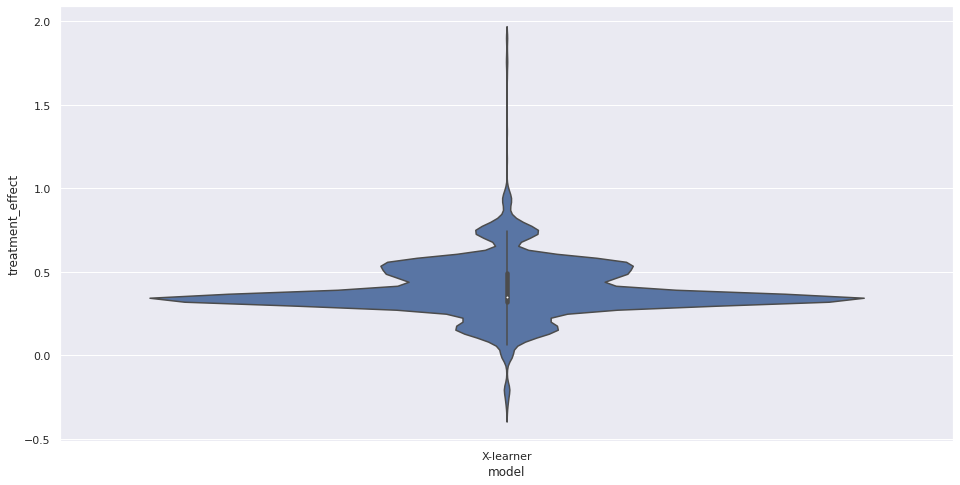

In [37]:
sns.violinplot(x = "model", y = "treatment_effect", data = X_learner_df);

The violin plot is quite narrow and that means the intervention has impact to the outcome which is achievement score. Because the plot tells us the higher probability is at 0.3~.